In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

# basic stuff
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import sklearn
import time
import json

# !pip install mat73

# dim reduction and visualization
from sklearn.decomposition import PCA
# !pip install umap
# !pip install umap-learn
# import umap.umap_ as umap
from sklearn.manifold import TSNE

# torch stuff
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torch import nn
import torch.nn.functional as F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_fft(signal):
    N = len(signal)
    dft = np.fft.fft(signal)
    freq = np.fft.fftfreq(N, 1/N)
    return dft, freq

In [3]:
jarvispreds20210712 = np.genfromtxt('jarvis_predictions/20210712_data3D.csv', delimiter = ',')
jarvispreds20210814 = np.genfromtxt('jarvis_predictions/20210814_data3D.csv', delimiter = ',')
jarvispreds20211105 = np.genfromtxt('jarvis_predictions/20211105_data3D.csv', delimiter = ',')
jarvispreds20220203 = np.genfromtxt('jarvis_predictions/20220203_data3D.csv', delimiter = ',')
jarvispreds20220210_001 = np.genfromtxt('jarvis_predictions/20220210uc_data3D.csv', delimiter = ',')
jarvispreds20220210_002 = np.genfromtxt('jarvis_predictions/20220210pipe_data3D.csv', delimiter = ',')
jarvispreds20220224 = np.genfromtxt('jarvis_predictions/20220224_data3D.csv', delimiter = ',')
jarvispreds20220405_002 = np.genfromtxt('jarvis_predictions/20220405uc_data3D.csv', delimiter = ',')

In [4]:
jarvispreds20220203.shape

(18000, 92)

In [5]:
jarvispreds_list_untrimmed = [jarvispreds20210712,jarvispreds20210814,jarvispreds20211105,jarvispreds20220203 
                    ,jarvispreds20220210_001,jarvispreds20220210_002,jarvispreds20220224,jarvispreds20220405_002]

In [7]:
# Remove likelihoods from jarvis csv's - they are every 4th column
# Trim videos to remove extra frames
jarvispreds_list = []
for jarvispred_untrimmed in jarvispreds_list_untrimmed:
    x = np.arange(92)
    liks = (np.arange(0, x.size+1, 4) -1)[1:]
    x = np.delete(x, liks)
    shape_before = jarvispred_untrimmed.shape
    num_frames = jarvispred_untrimmed.shape[0]
    num_frames_trimmed = int(num_frames/18000)*18000
    jarvispred_trimmed = jarvispred_untrimmed[:num_frames_trimmed, x]
    shape_after = jarvispred_trimmed.shape
    jarvispreds_list.append(jarvispred_trimmed)
    print('Shape before: {}, shape after: {}'.format(shape_before, shape_after))

Shape before: (37455, 92), shape after: (36000, 69)
Shape before: (55374, 92), shape after: (54000, 69)
Shape before: (36930, 92), shape after: (36000, 69)
Shape before: (18000, 92), shape after: (18000, 69)
Shape before: (18475, 92), shape after: (18000, 69)
Shape before: (18000, 92), shape after: (18000, 69)
Shape before: (18464, 92), shape after: (18000, 69)
Shape before: (18000, 92), shape after: (18000, 69)


In [9]:
jarvispreds_list[0].shape

(36000, 69)

In [ ]:
jarvisinputs.reshape((-1, 100, 69), order = 'C')

In [42]:
jarvispreds_list[3][:100,0]

array([27.20462799, 27.34856415, 27.35157776, 26.83955383, 26.54216766,
       25.92346191, 26.04629517, 25.78775787, 25.64758301, 25.57633972,
       25.8441925 , 25.73181152, 26.38446808, 23.27786255, 25.16990662,
       26.31861115, 29.11830902, 25.47183228, 26.53340912, 24.99707031,
       25.49555206, 23.34374237, 25.06941986, 25.84085083, 25.0484848 ,
       25.65632629, 26.92192078, 27.09642029, 27.23558044, 26.74099731,
       26.67441559, 25.12806702, 25.79071808, 25.71556091, 25.32040405,
       25.62332916, 24.41059875, 24.61201477, 23.12410736, 23.36347198,
       19.59448242, 23.26448059, 18.52938843, 21.42100525, 19.12468719,
       22.69189453, 20.39642334, 23.25332642, 23.91324615, 23.68649292,
       23.73877716, 24.69789124, 24.93335724, 24.50086212, 25.08126831,
       24.04239655, 24.49347687, 22.778862  , 24.4254303 , 22.9484787 ,
       21.68424225, 27.16676331, 24.72088623, 25.73563385, 23.14144897,
       24.57717133, 23.634552  , 25.87483215, 26.03451538, 25.77

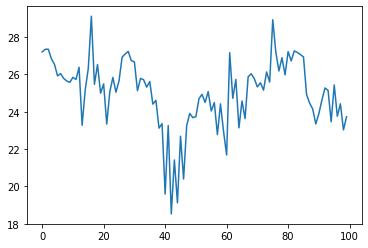

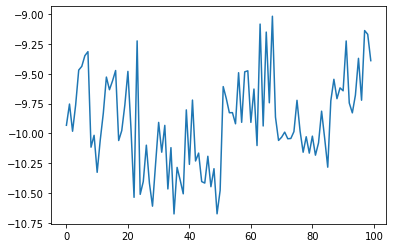

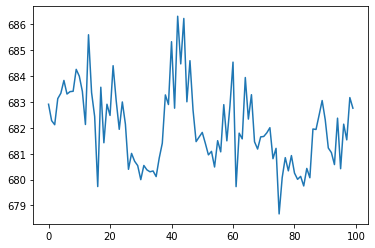

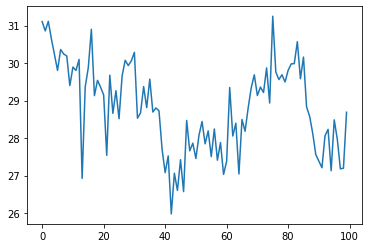

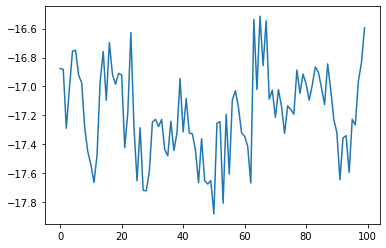

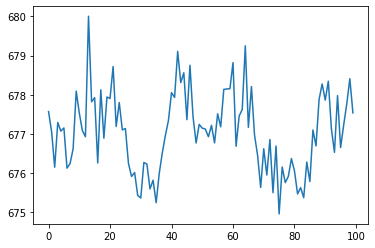

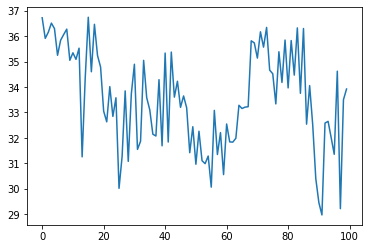

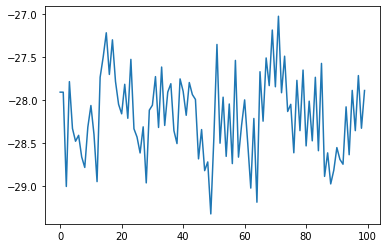

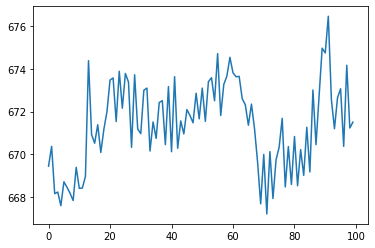

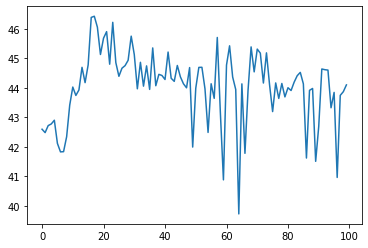

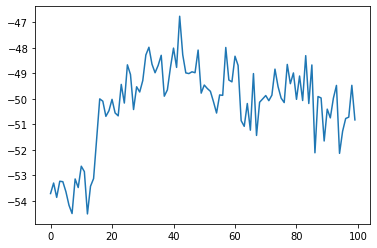

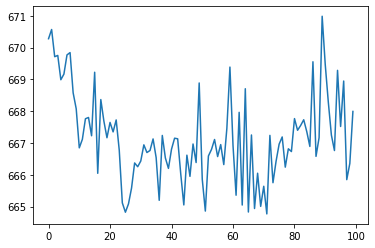

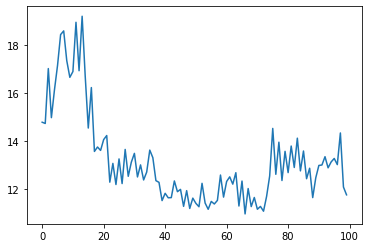

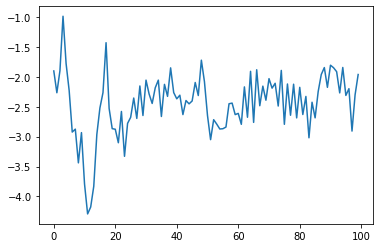

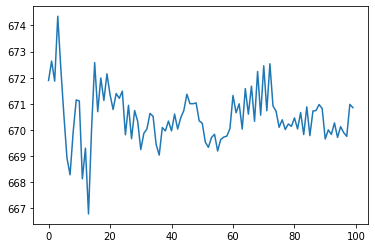

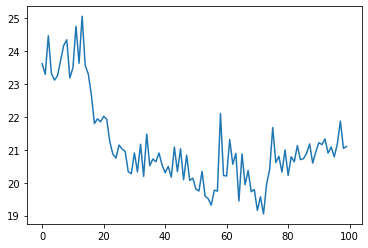

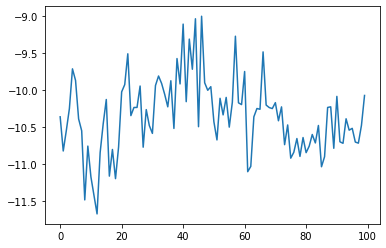

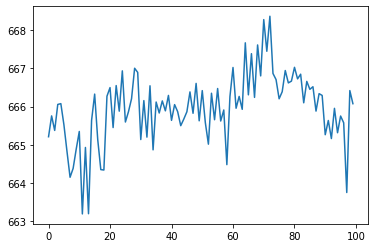

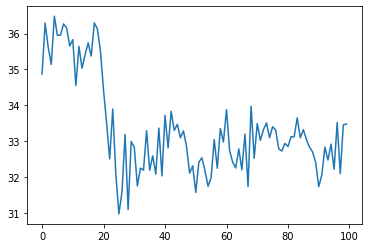

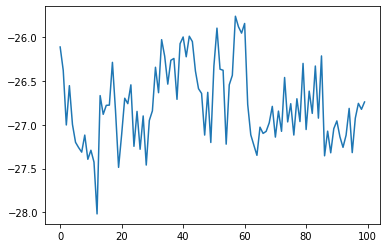

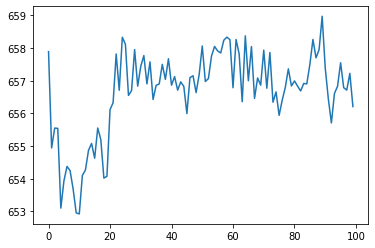

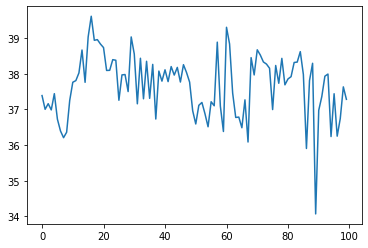

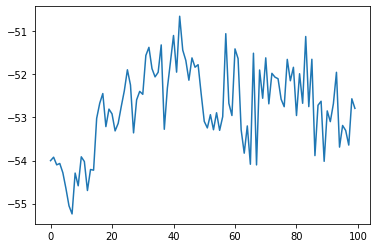

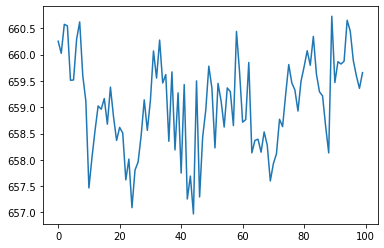

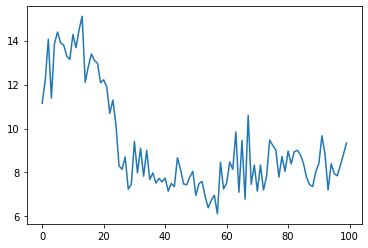

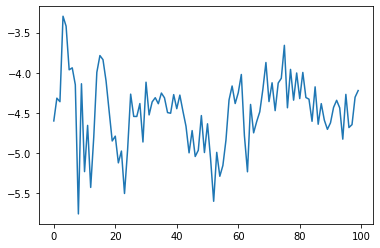

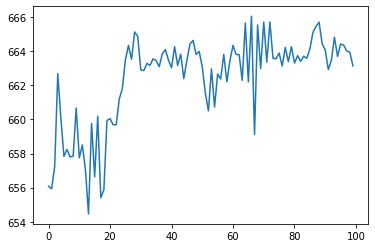

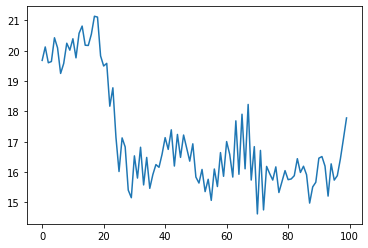

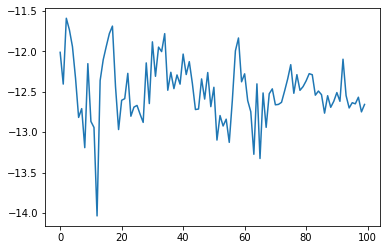

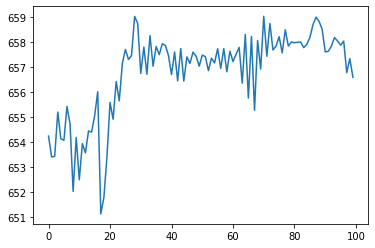

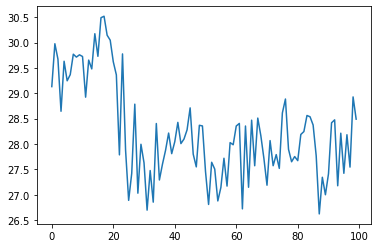

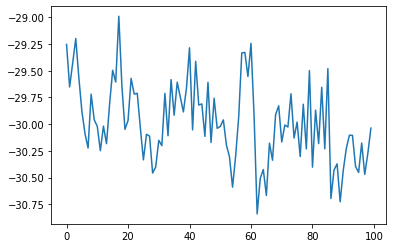

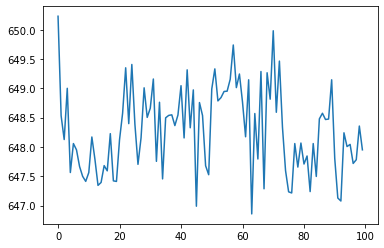

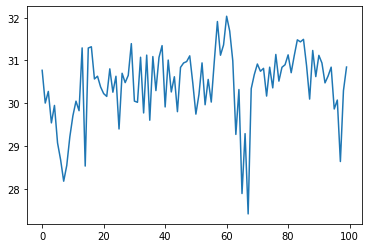

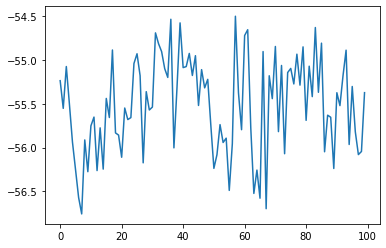

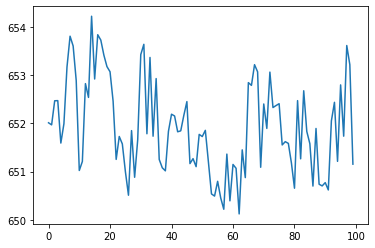

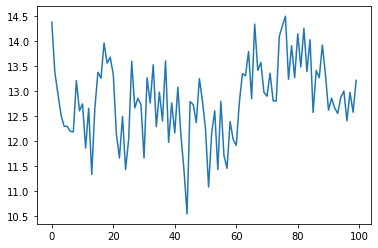

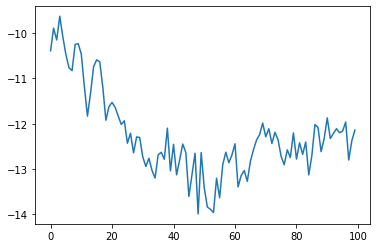

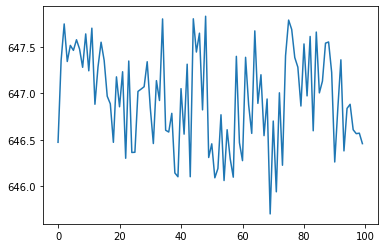

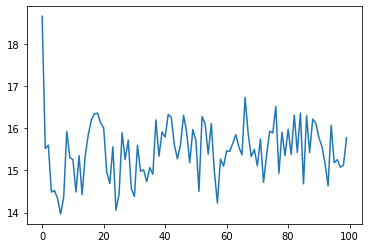

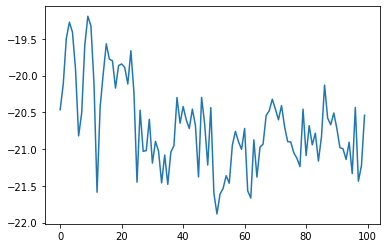

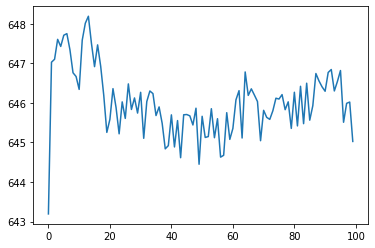

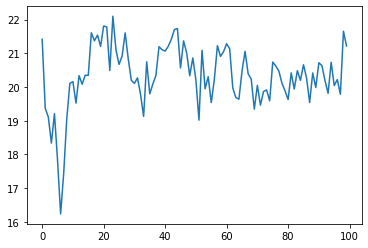

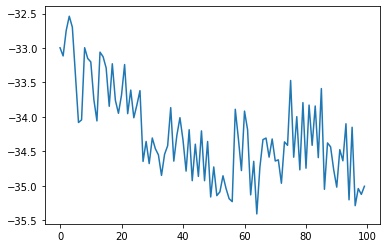

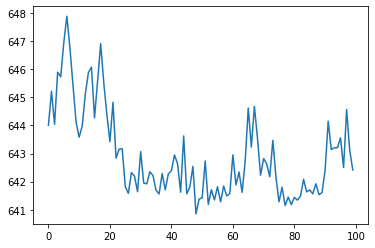

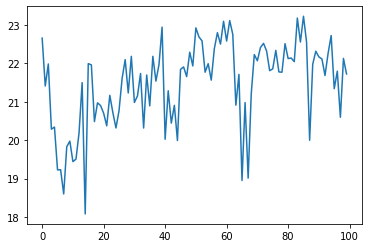

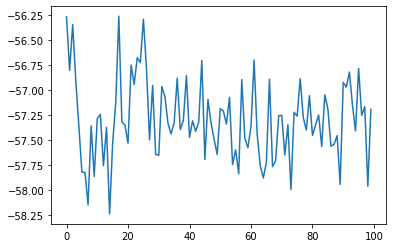

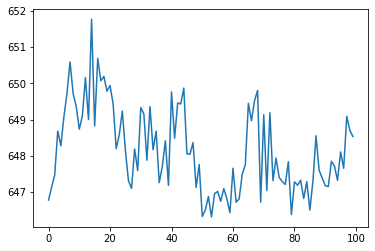

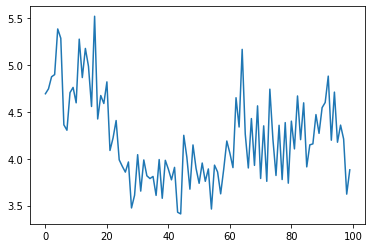

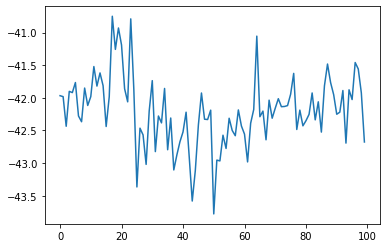

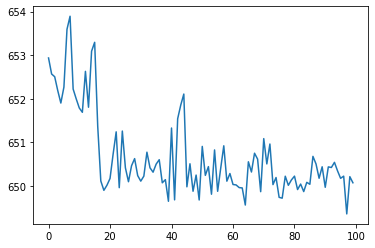

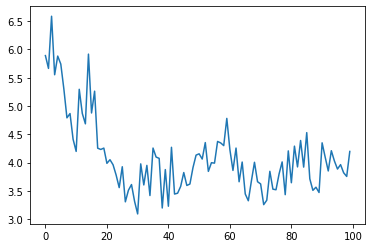

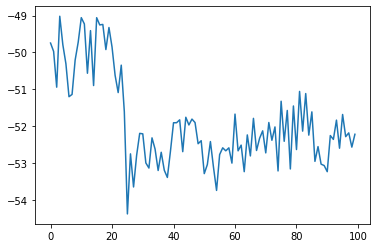

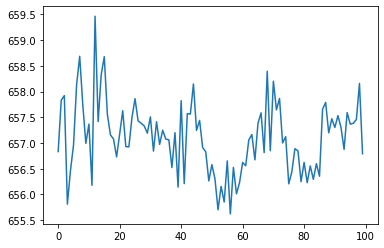

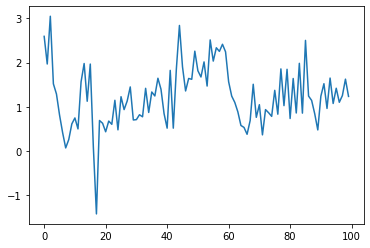

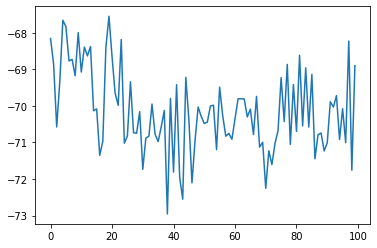

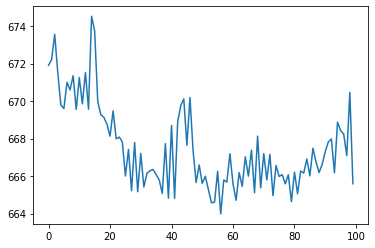

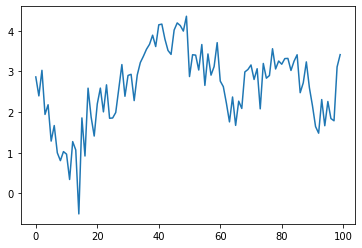

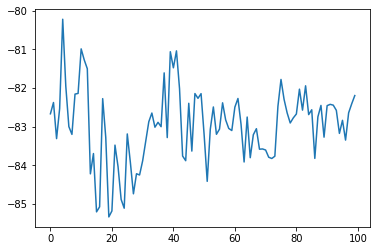

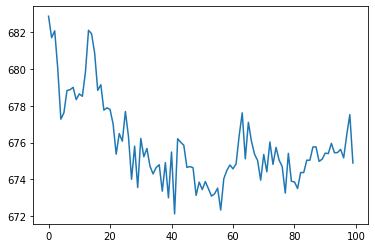

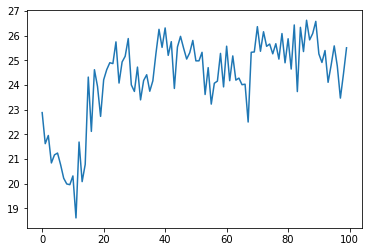

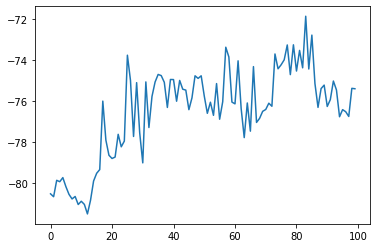

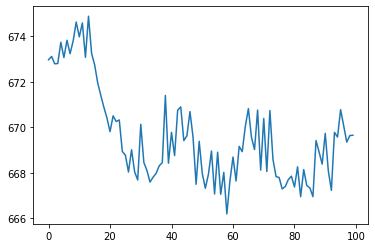

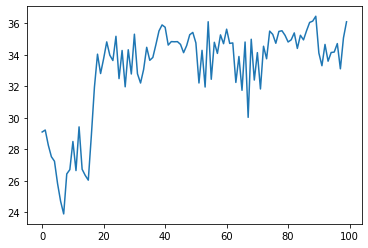

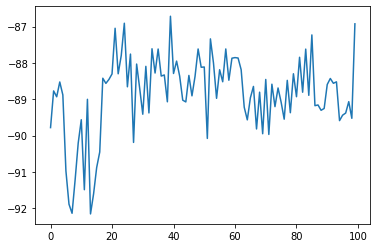

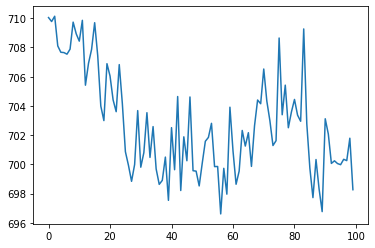

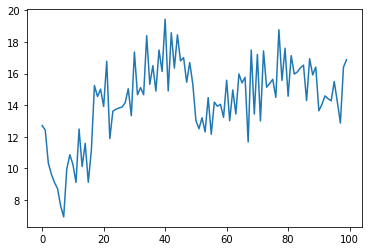

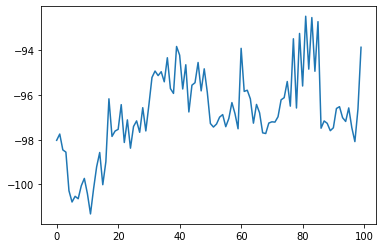

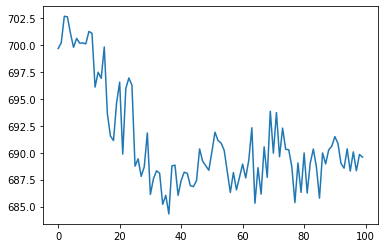

In [43]:
for i in range(69):
    plt.plot(jarvispreds_list[3][:100,i])
    plt.show()

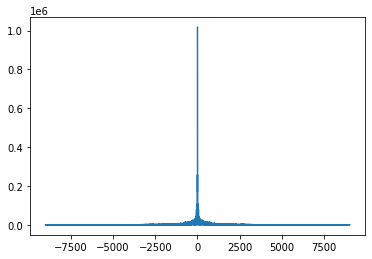

Max coefficient values: [ 258358.76898694  258358.76898694 1016818.48219681], Corresponding Frequencies: [-2.  2.  0.]


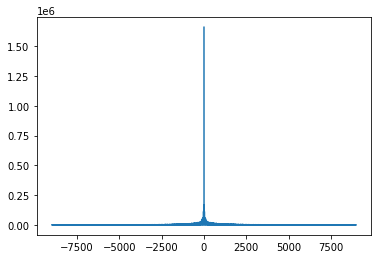

Max coefficient values: [ 168138.11124289  168138.11124289 1660808.01226807], Corresponding Frequencies: [ 2. -2.  0.]


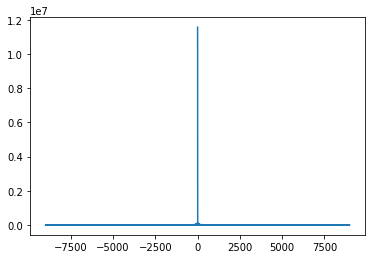

Max coefficient values: [  136886.413987     136886.413987   11562469.29205322], Corresponding Frequencies: [-3.  3.  0.]


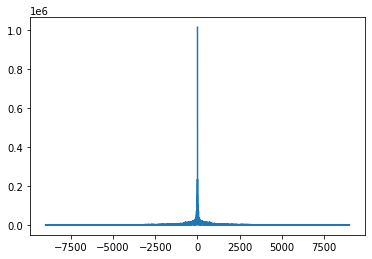

Max coefficient values: [ 234703.74336932  234703.74336932 1015524.95615768], Corresponding Frequencies: [-2.  2.  0.]


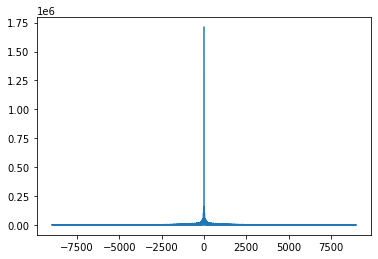

Max coefficient values: [ 156513.41334884  156513.41334884 1709910.1760025 ], Corresponding Frequencies: [-2.  2.  0.]


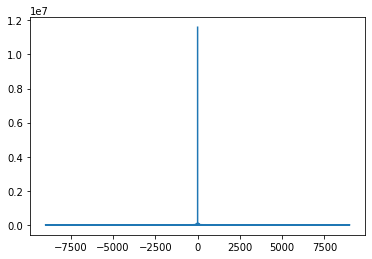

Max coefficient values: [  131347.19475809   131347.19475809 11593940.14111328], Corresponding Frequencies: [-3.  3.  0.]


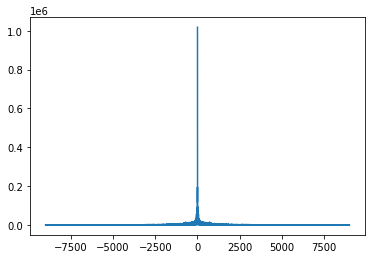

Max coefficient values: [ 194978.52052077  194978.52052077 1018542.08142471], Corresponding Frequencies: [ 2. -2.  0.]


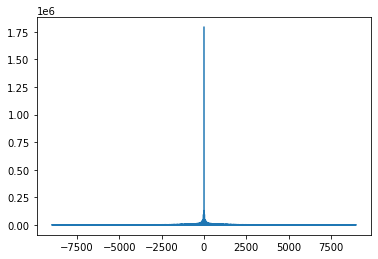

Max coefficient values: [ 129633.73107956  129633.73107956 1790748.7860527 ], Corresponding Frequencies: [ 2. -2.  0.]


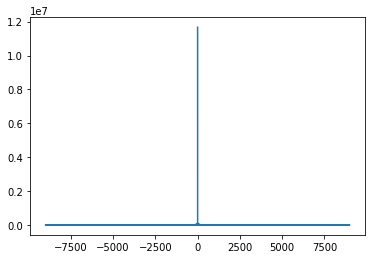

Max coefficient values: [  117980.32316595   117980.32316595 11667886.0592041 ], Corresponding Frequencies: [ 2. -2.  0.]


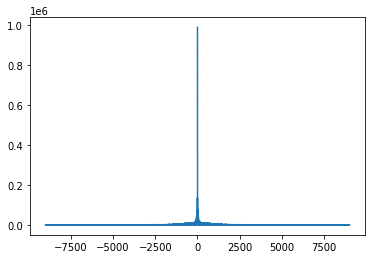

Max coefficient values: [135265.2431187  135265.2431187  987576.46556091], Corresponding Frequencies: [-2.  2.  0.]


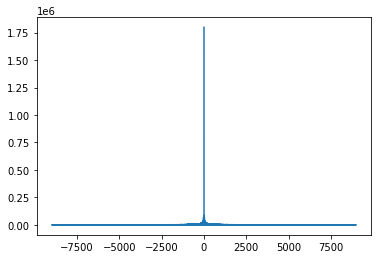

Max coefficient values: [  87098.01016164   87098.01016164 1798313.93840027], Corresponding Frequencies: [-2.  2.  0.]


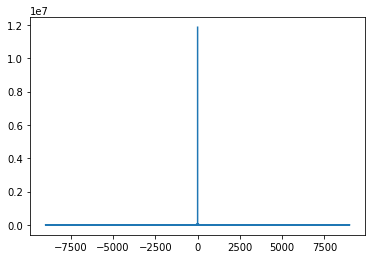

Max coefficient values: [   78465.69577152    78465.69577152 11860598.06616211], Corresponding Frequencies: [ 2. -2.  0.]


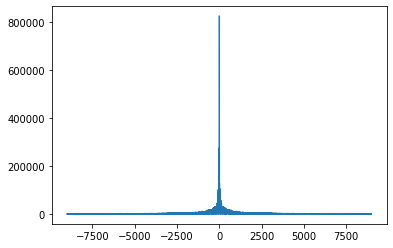

Max coefficient values: [274247.8411583  274247.8411583  822677.78367615], Corresponding Frequencies: [ 2. -2.  0.]


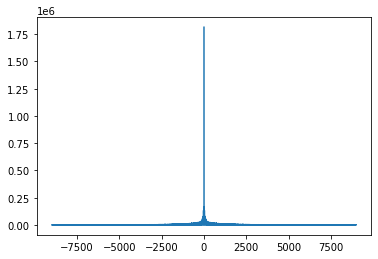

Max coefficient values: [ 163607.35794166  163607.35794166 1813639.72425079], Corresponding Frequencies: [ 2. -2.  0.]


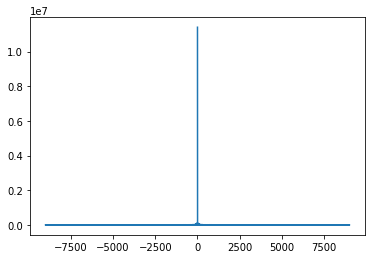

Max coefficient values: [  136895.99182357   136895.99182357 11399311.2409668 ], Corresponding Frequencies: [-3.  3.  0.]


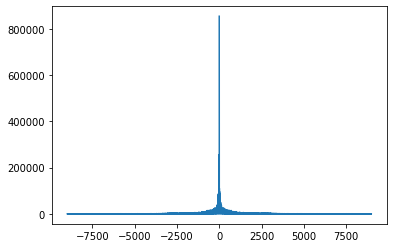

Max coefficient values: [256211.58270743 256211.58270743 853836.94248962], Corresponding Frequencies: [-2.  2.  0.]


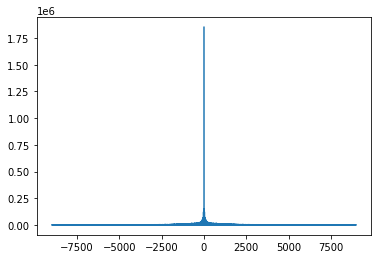

Max coefficient values: [ 150917.09611828  150917.09611828 1851297.37749481], Corresponding Frequencies: [ 2. -2.  0.]


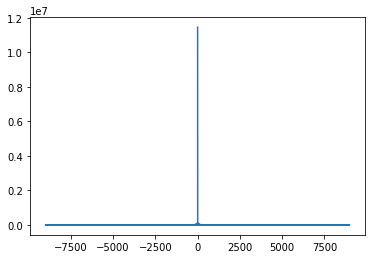

Max coefficient values: [  129484.38364712   129484.38364712 11455229.13641357], Corresponding Frequencies: [-3.  3.  0.]


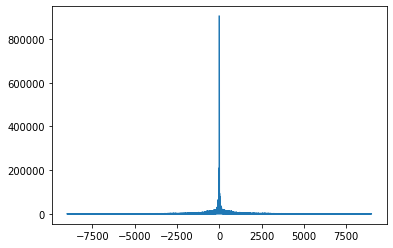

Max coefficient values: [209825.97652401 209825.97652401 903787.36830521], Corresponding Frequencies: [-2.  2.  0.]


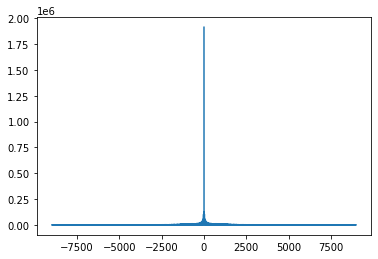

Max coefficient values: [ 123674.66207321  123674.66207321 1912395.66765594], Corresponding Frequencies: [ 2. -2.  0.]


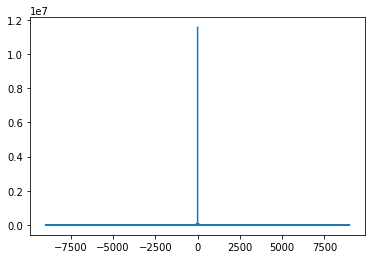

Max coefficient values: [  109762.20741596   109762.20741596 11575002.20672607], Corresponding Frequencies: [ 3. -3.  0.]


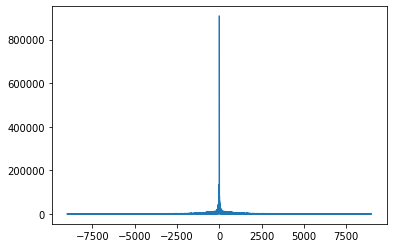

Max coefficient values: [134801.55254343 134801.55254343 906996.48749161], Corresponding Frequencies: [-2.  2.  0.]


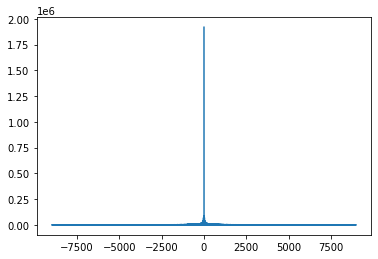

Max coefficient values: [  85690.61353893   85690.61353893 1918375.19330215], Corresponding Frequencies: [-4.  4.  0.]


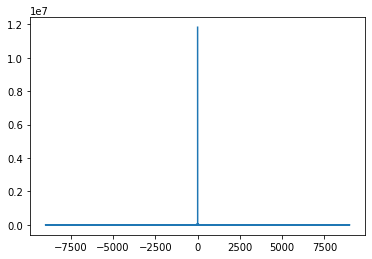

Max coefficient values: [   66402.04442028    66402.04442028 11821288.74945068], Corresponding Frequencies: [-2.  2.  0.]


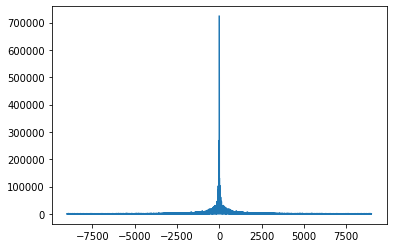

Max coefficient values: [268460.25291261 268460.25291261 723219.3302269 ], Corresponding Frequencies: [ 2. -2.  0.]


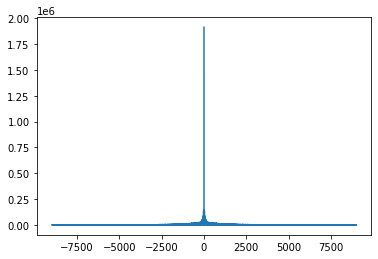

Max coefficient values: [ 140622.06332985  140622.06332985 1912803.75225449], Corresponding Frequencies: [ 2. -2.  0.]


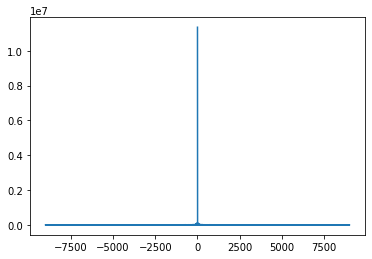

Max coefficient values: [  124968.84511757   124968.84511757 11348797.66705322], Corresponding Frequencies: [-3.  3.  0.]


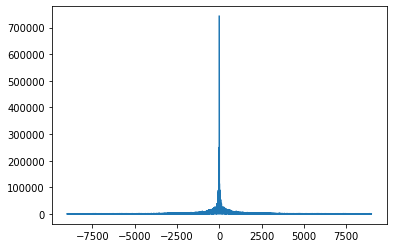

Max coefficient values: [249578.80167865 249578.80167865 742614.22909546], Corresponding Frequencies: [ 2. -2.  0.]


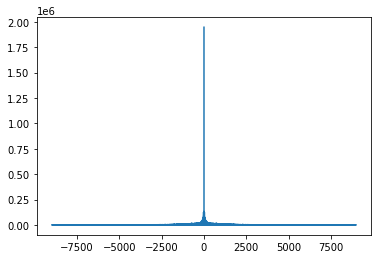

Max coefficient values: [ 132330.56604525  132330.56604525 1947156.08418655], Corresponding Frequencies: [-2.  2.  0.]


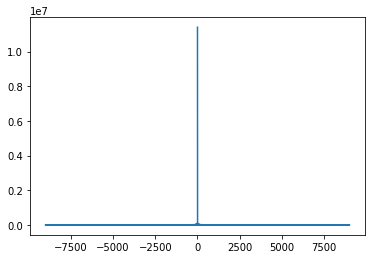

Max coefficient values: [  116148.54396569   116148.54396569 11402080.80957031], Corresponding Frequencies: [-3.  3.  0.]


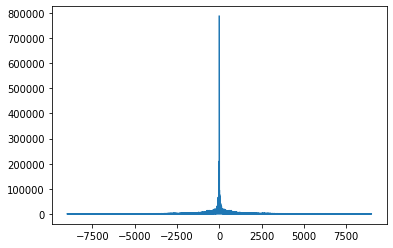

Max coefficient values: [209233.06628123 209233.06628123 786896.15517807], Corresponding Frequencies: [ 2. -2.  0.]


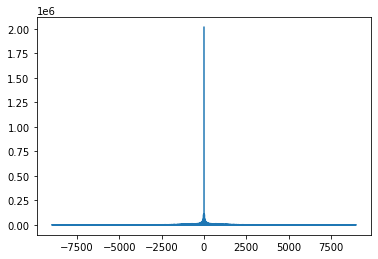

Max coefficient values: [ 108472.76937174  108472.76937174 2014944.94936371], Corresponding Frequencies: [ 2. -2.  0.]


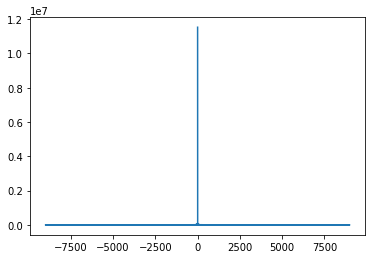

Max coefficient values: [   96778.23074536    96778.23074536 11526200.93127441], Corresponding Frequencies: [-3.  3.  0.]


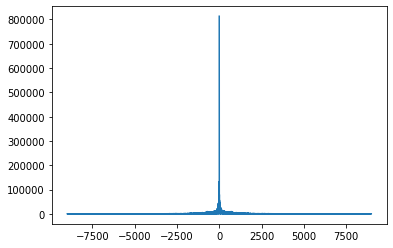

Max coefficient values: [132516.24525103 132516.24525103 813210.59638214], Corresponding Frequencies: [ 2. -2.  0.]


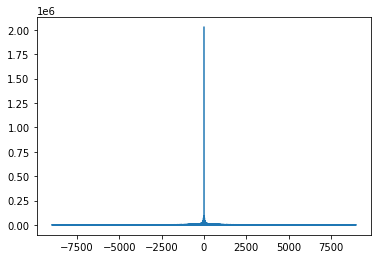

Max coefficient values: [  92696.90842477   92696.90842477 2027289.52173615], Corresponding Frequencies: [ 4. -4.  0.]


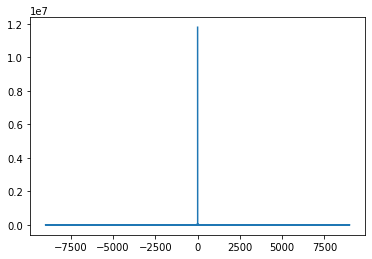

Max coefficient values: [   52255.12802924    52255.12802924 11789225.09436035], Corresponding Frequencies: [-2.  2.  0.]


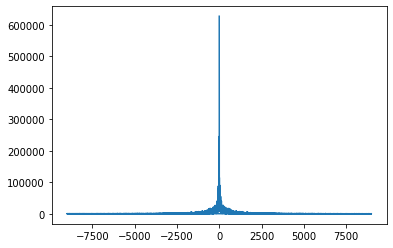

Max coefficient values: [245527.16002509 245527.16002509 626813.54178619], Corresponding Frequencies: [ 2. -2.  0.]


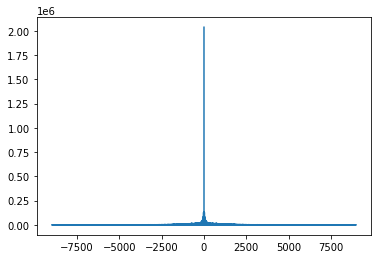

Max coefficient values: [ 128956.92075175  128956.92075175 2035286.75505066], Corresponding Frequencies: [ 23. -23.   0.]


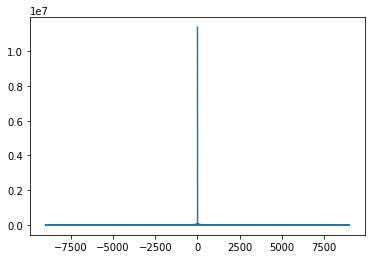

Max coefficient values: [   98168.77024895    98168.77024895 11381387.74188232], Corresponding Frequencies: [-3.  3.  0.]


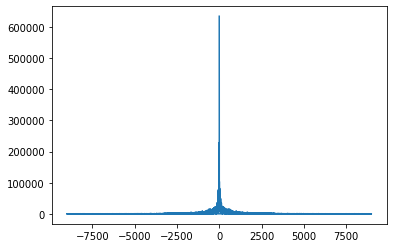

Max coefficient values: [228806.7647697  228806.7647697  634172.07151413], Corresponding Frequencies: [-2.  2.  0.]


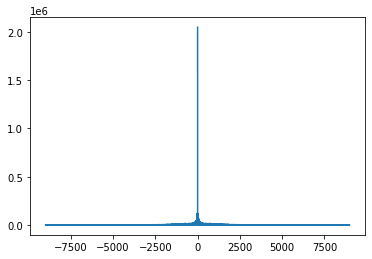

Max coefficient values: [ 122736.61871806  122736.61871806 2049615.35893631], Corresponding Frequencies: [-4.  4.  0.]


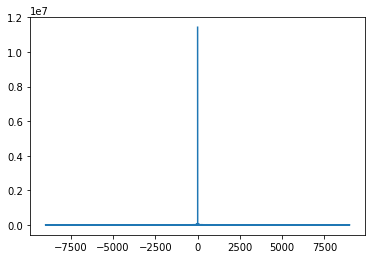

Max coefficient values: [   91219.75159361    91219.75159361 11430369.96734619], Corresponding Frequencies: [ 3. -3.  0.]


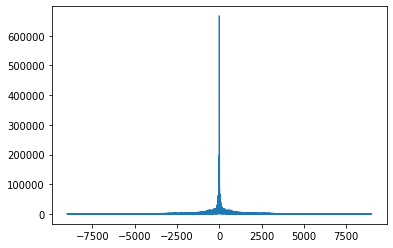

Max coefficient values: [195392.81926851 195392.81926851 665396.09671402], Corresponding Frequencies: [ 2. -2.  0.]


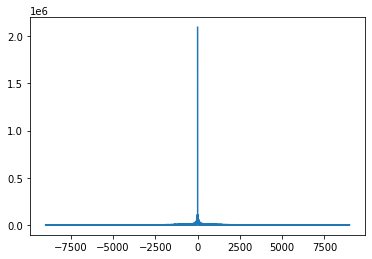

Max coefficient values: [ 112160.41005727  112160.41005727 2095321.33892441], Corresponding Frequencies: [-4.  4.  0.]


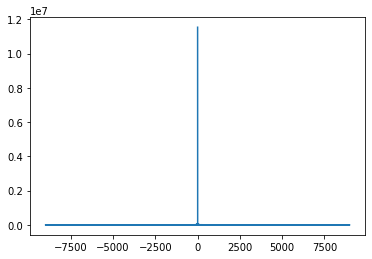

Max coefficient values: [   79162.70936685    79162.70936685 11538039.32995605], Corresponding Frequencies: [ 3. -3.  0.]


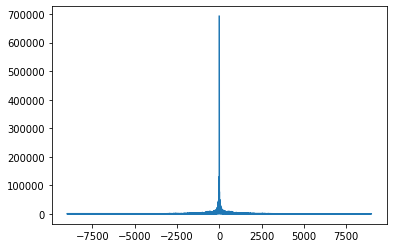

Max coefficient values: [130058.52070813 130058.52070813 692184.77090073], Corresponding Frequencies: [-2.  2.  0.]


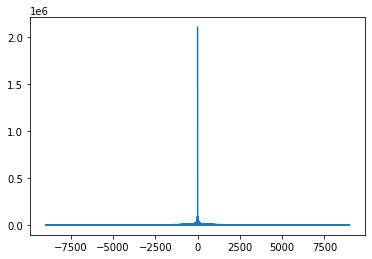

Max coefficient values: [  97759.81093566   97759.81093566 2105828.27648926], Corresponding Frequencies: [-4.  4.  0.]


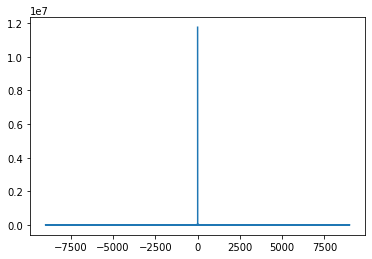

Max coefficient values: [   41629.5388088    41629.5388088 11759856.6496582], Corresponding Frequencies: [-3.  3.  0.]


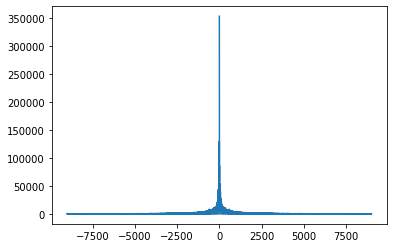

Max coefficient values: [129667.15128441 129667.15128441 353581.12780762], Corresponding Frequencies: [ 2. -2.  0.]


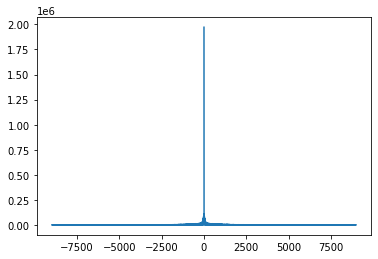

Max coefficient values: [ 107427.74002605  107427.74002605 1971836.35005951], Corresponding Frequencies: [-6.  6.  0.]


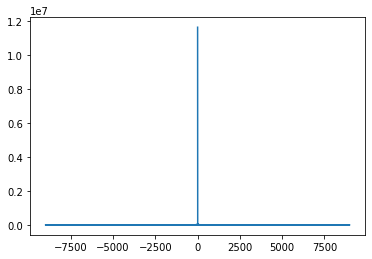

Max coefficient values: [   53072.12234734    53072.12234734 11641191.0098877 ], Corresponding Frequencies: [-3.  3.  0.]


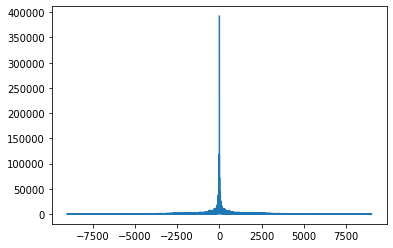

Max coefficient values: [118387.27433475 118387.27433475 392168.58576584], Corresponding Frequencies: [ 2. -2.  0.]


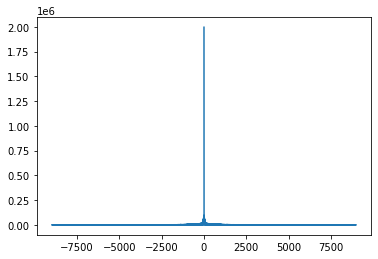

Max coefficient values: [  96433.09258117   96433.09258117 1995859.74437332], Corresponding Frequencies: [-6.  6.  0.]


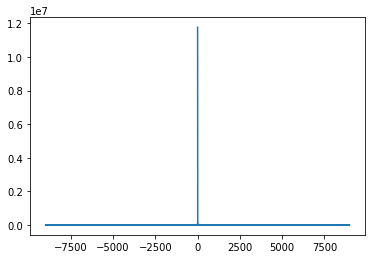

Max coefficient values: [   41437.81806908    41437.81806908 11770075.19561768], Corresponding Frequencies: [-3.  3.  0.]


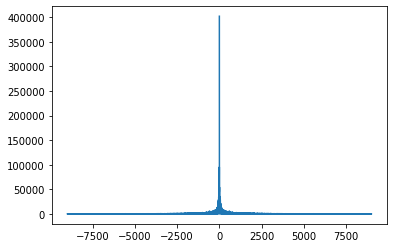

Max coefficient values: [ 95142.04588848  95142.04588848 401736.44719315], Corresponding Frequencies: [ 2. -2.  0.]


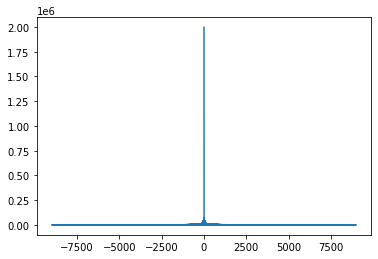

Max coefficient values: [  75060.73420115   75060.73420115 1997197.04015732], Corresponding Frequencies: [-6.  6.  0.]


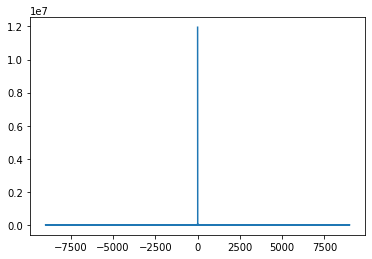

Max coefficient values: [   34039.7061455     34039.7061455  11952773.43951416], Corresponding Frequencies: [-1.  1.  0.]


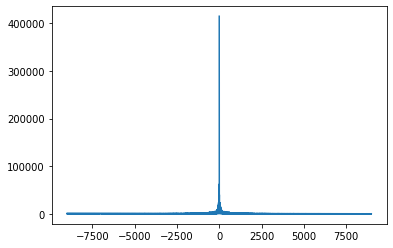

Max coefficient values: [ 62392.14719278  62392.14719278 414764.94560242], Corresponding Frequencies: [-2.  2.  0.]


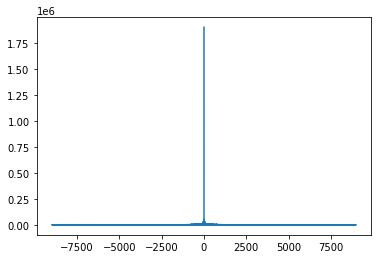

Max coefficient values: [  45714.89024061   45714.89024061 1901014.24923325], Corresponding Frequencies: [ 6. -6.  0.]


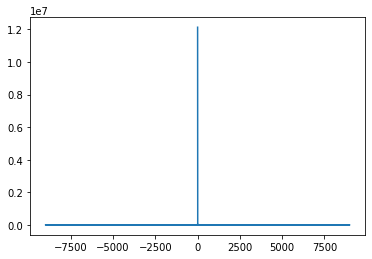

Max coefficient values: [   32818.79126906    32818.79126906 12134436.59765625], Corresponding Frequencies: [-1.  1.  0.]


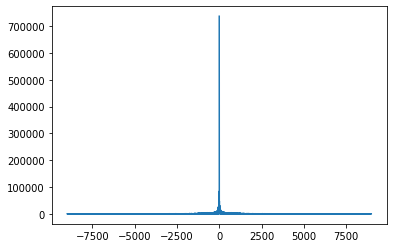

Max coefficient values: [ 84250.63655275  84250.63655275 737080.69213867], Corresponding Frequencies: [-2.  2.  0.]


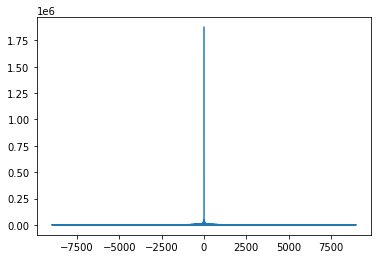

Max coefficient values: [  46199.56257632   46199.56257632 1874491.87038422], Corresponding Frequencies: [ 2. -2.  0.]


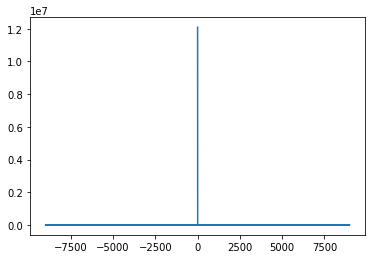

Max coefficient values: [   30364.6316248     30364.6316248  12087535.41265869], Corresponding Frequencies: [-2.  2.  0.]


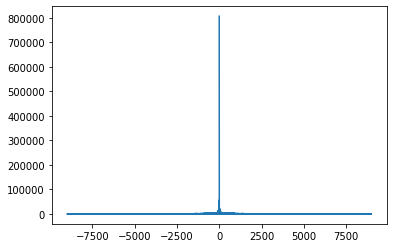

Max coefficient values: [ 56214.6477629   56214.6477629  806328.38199615], Corresponding Frequencies: [-2.  2.  0.]


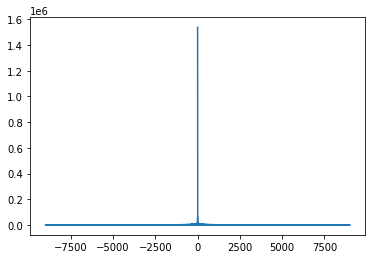

Max coefficient values: [  57661.21100676   57661.21100676 1538807.24958801], Corresponding Frequencies: [-1.  1.  0.]


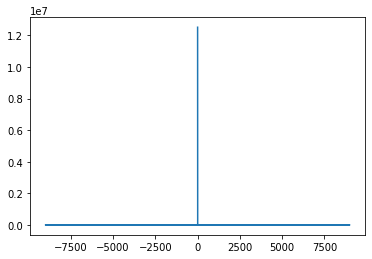

Max coefficient values: [   35292.55822734    35292.55822734 12516302.78912354], Corresponding Frequencies: [-2.  2.  0.]


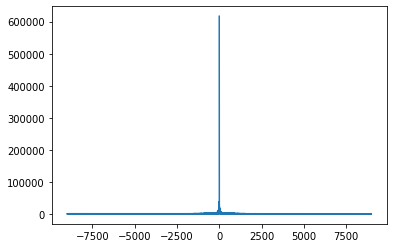

Max coefficient values: [ 38399.9274098   38399.9274098  616755.51715469], Corresponding Frequencies: [ 2. -2.  0.]


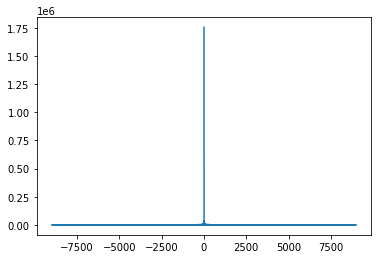

Max coefficient values: [  29807.8784443    29807.8784443  1755405.80575562], Corresponding Frequencies: [-1.  1.  0.]


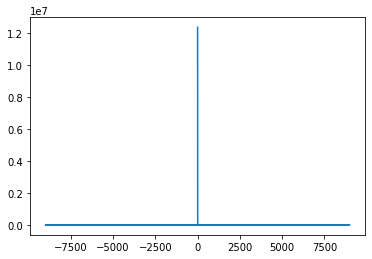

Max coefficient values: [   23745.41080058    23745.41080058 12377338.78381348], Corresponding Frequencies: [-1.  1.  0.]


In [46]:
for i in range(69):
    signal = jarvispreds_list[3][:,i]
    dft, freq = get_fft(signal)
    plt.plot(freq, abs(dft))
    plt.show()
    
    ind = np.argpartition(abs(dft), -3)[-3:]
    print('Max coefficient values: {}, Corresponding Frequencies: {}'.format(abs(dft)[ind], freq[ind]))

In [35]:
class CustomDataset(Dataset):
    def __init__(self, date, normalize_inputs = False, shuffle = False):

        jarvispred, neuraldata = jarvispreds_list_nonans[index_dict[date]], neuraldata_list_nonans[index_dict[date]].spike_counts[:-1,:]
        self.date = date
        self.jarvisinputs = jarvispred
        self.num_neural_units = neuraldata.shape[1]
        self.neuraloutputs = neuraldata.reshape((-1, 100, self.num_neural_units), order = 'C') #I checked. We want order C
        self.normalize_inputs = normalize_inputs

        def normalize_inputs(inp):
            mean = np.mean(inp, axis = 0)
            var = np.var(inp, axis = 0)

            normalized_inputs = []
            for trial in self.jarvisinputs:
                normalized = (trial-mean)/var
                normalized_inputs.append(normalized)

            return(normalized_inputs)

        def shuffle_data(g, n, t, sn):
            assert len(g) == len(n)
            assert len(g) == len(t)
            assert len(g) == len(sn)
            p = np.random.permutation(len(g))
            return(g[p], n[p], t[p], sn[p])

        if normalize_inputs == True:
            self.jarvisinputs_normalized = normalize_inputs(self.jarvisinputs)
        self.jarvisinputs = self.jarvisinputs.reshape((-1, 100, 69), order = 'C') #I checked. We want order C

        if shuffle == True:
            self.jarvisinputs, self.neuraloutputs = shuffle_data(self.gloveinputs, self.neuraloutputs)

    def __len__(self):
        assert len(self.jarvisinputs) == len(self.neuraloutputs)
        return len(self.jarvisinputs)

    def __getitem__(self, idx):
        if self.normalize_inputs == True:
            jarvisinput = torch.from_numpy(self.jarvisinput_normalized[idx])
        else:
            jarvisinput = torch.from_numpy(self.jarvisinputs[idx])
        neuraloutput = torch.from_numpy(self.neuraloutputs[idx])

        return jarvisinput.float().t(), neuraloutput.float() #input is transposed for convenience - better for Conv1D